In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd
import numpy as np


In [3]:
src_path = os.path.abspath(os.path.join(os.getcwd(),"../"))
sys.path.append(src_path)
try:
    from src.backtester import single_name_backtester
    from src.visualize import plot_wealth_path
    from src.performance import performance_summary
except ImportError as e:
    print('Custom modules not found. Please ensure src/ is available.')
    print('ImportError:', e)    


In [13]:
data_file = "../data/processed/core_assets_master.csv"
master_df = pd.read_csv(data_file, index_col = "Date")
master_df.index = pd.to_datetime(master_df.index)

print(master_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1860 entries, 1871-01-31 to 2025-12-31
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sp500_Price                   1860 non-null   float64
 1   sp500_Dividend                1860 non-null   float64
 2   sp500_Price_Return            1859 non-null   float64
 3   sp500_Total_Return            1859 non-null   float64
 4   sp500_Accumulated_Dividend    1860 non-null   float64
 5   sp500_Price_Index             1860 non-null   float64
 6   sp500_TR_Index                1860 non-null   float64
 7   10Y_Treasury_Annual_Rate (%)  1860 non-null   float64
 8   10Y_Monthly_Rate (decimal)    1860 non-null   float64
 9   10Y_Monthly_Rate (%)          1860 non-null   float64
 10  10Y bond_Total_Return         1860 non-null   float64
 11  10Y bond_Price_Return         1860 non-null   float64
 12  10Y bond_Price                1860 non-null 

In [20]:
sp500_df = master_df[["sp500_Price", "sp500_Dividend", "sp500_Price_Return", "sp500_Total_Return", "CPI"]].round(6)
bond_df = master_df[["10Y bond_Price", "10Y bond_Coupon_Income", "10Y bond_Price_Return", "10Y bond_Total_Return", "CPI"]].round(6)


In [ ]:
start_date = "01-01-2020" 
end_date = None
initial_investment = 1.0

In [ ]:
# This cell runs the backtester for the S&P 500 using the specified start and end dates,
# initial investment, CPI for real wealth calculation, and sets real_wealth=True.


# The configuration demonstrates a real (inflation-adjusted) wealth path 
# for a buy-and-hold strategy with full reinvestment of dividends.

sp500_rets = sp500_df[["sp500_Price_Return", "sp500_Total_Return"]].loc[start_date:end_date]

sp500_wealth_path = single_name_backtester(
    sp500_df,  start_date, end_date, 
    initial_investment= initial_investment, 
    cpi= sp500_df["CPI"], 
    asset_name ="sp500", 
    real_wealth=True)

# The configuration below now demonstrates a nominal wealth path 
# for a buy-and-hold strategy without reinvestment of dividends.
# It shows how the wealth path looks in nominal terms only. 


sp500_wealth_path_acc = single_name_backtester(
    sp500_df, start_date, end_date, 
    initial_investment= initial_investment, 
    asset_name ="sp500", is_accumulated=True)

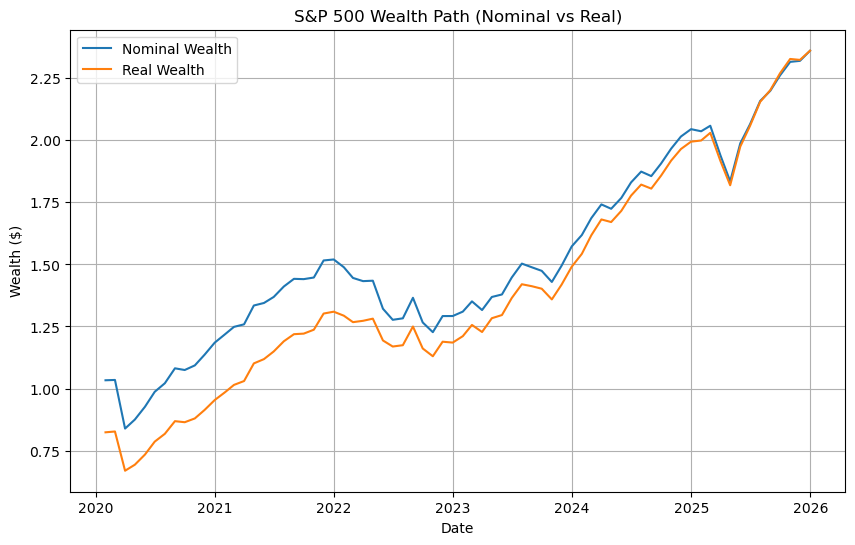

In [7]:
# plot configs for nominal vs real wealth path comparison
# Case of full reinvestment of dividends. 

columns_to_plot = ["sp500_nominal_wealth", "sp500_real_wealth"]
title = "S&P 500 Wealth Path (Nominal vs Real)"
labels = {"sp500_nominal_wealth": "Nominal Wealth", "sp500_real_wealth": "Real Wealth"}
plot_wealth_path(sp500_wealth_path, columns_to_plot, labels, title)

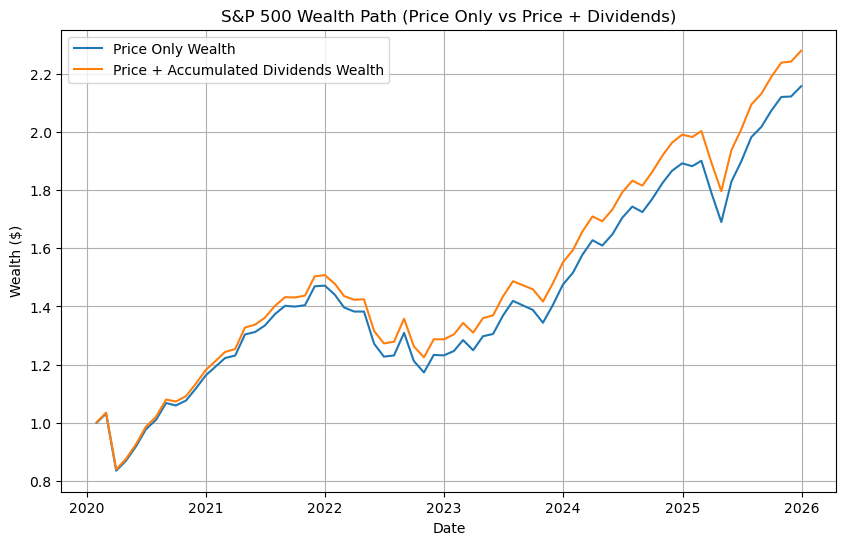

In [8]:
# plot configs
# Case without reinvestment of dividends.
# Compare price only wealth path vs price wealth + accumulated dividends wealth path in nominal terms.
# This shows the impact of dividends on wealth accumulation over time.
columns_to_plot_acc = ["sp500_price_wealth", "sp500_nominal_wealth"]
title_acc = "S&P 500 Wealth Path (Price Only vs Price + Dividends)"
labels_acc = {"sp500_price_wealth": "Price Only Wealth", "sp500_nominal_wealth": "Price + Accumulated Dividends Wealth"}
plot_wealth_path(sp500_wealth_path_acc, columns_to_plot_acc, labels_acc, title_acc)

In [9]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
sp500_summary_df = performance_summary(sp500_rets).T
print(sp500_summary_df)

              sp500_Price_Return  sp500_Total_Return
CAGR                      0.1367              0.1539
Volatility                0.1395              0.1396
Sharpe                    0.9956              1.1036
Max Drawdown             -0.2029             -0.1926
VaR (5%)                  0.0569              0.0558
CVaR (5%)                 0.1009              0.0996
Skew                     -2.0814             -2.0698
Kurtosis                 11.1127             11.0462


In [21]:
bond_df.columns

Index(['10Y bond_Price', '10Y bond_Coupon_Income', '10Y bond_Price_Return',
       '10Y bond_Total_Return', 'CPI'],
      dtype='object')

In [23]:
# This cell runs the backtester for the S&P 500 using the specified start and end dates,
# initial investment, CPI for real wealth calculation, and sets real_wealth=True.


# The configuration demonstrates a real (inflation-adjusted) wealth path 
# for a buy-and-hold strategy with full reinvestment of dividends.

bond_rets = bond_df[["10Y bond_Price_Return", "10Y bond_Total_Return"]].loc[start_date:end_date]

bond_wealth_path = single_name_backtester(
    bond_df,  start_date, end_date, 
    initial_investment= initial_investment, 
    cpi= bond_df["CPI"], 
    asset_name ="10Y bond", 
    real_wealth=True)

# The configuration below now demonstrates a nominal wealth path 
# for a buy-and-hold strategy without reinvestment of dividends.
# It shows how the wealth path looks in nominal terms only. 


bond_wealth_path_acc = single_name_backtester(
    bond_df, start_date, end_date, 
    initial_investment= initial_investment, 
    asset_name ="10Y bond", is_accumulated=True)

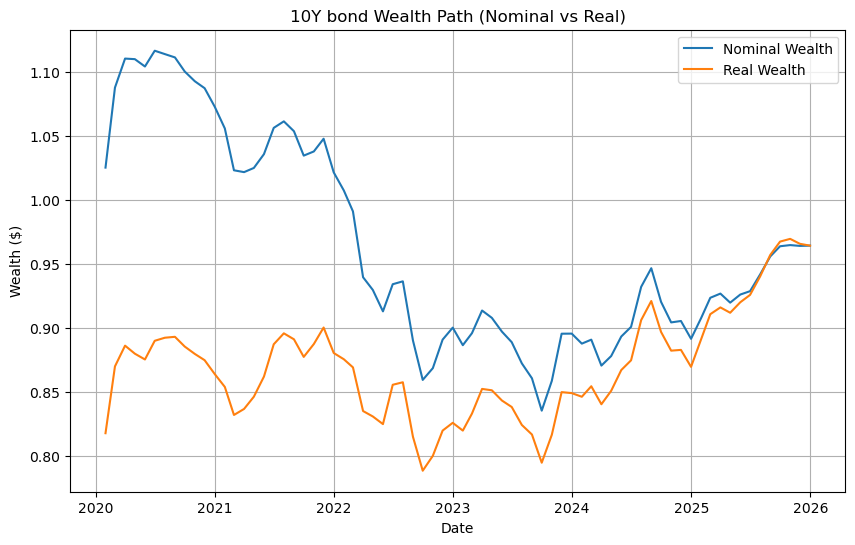

In [24]:
# plot configs for nominal vs real wealth path comparison
# Case of full reinvestment of dividends. 

columns_to_plot = ["10Y bond_nominal_wealth", "10Y bond_real_wealth"]
title = "10Y bond Wealth Path (Nominal vs Real)"
labels = {"10Y bond_nominal_wealth": "Nominal Wealth", "10Y bond_real_wealth": "Real Wealth"}
plot_wealth_path(bond_wealth_path, columns_to_plot, labels, title)

In [25]:
bond_summary_df = performance_summary(bond_rets).T
print(bond_summary_df)

              10Y bond_Price_Return  10Y bond_Total_Return
CAGR                        -0.0350                -0.0060
Volatility                   0.0671                 0.0675
Sharpe                      -0.4977                -0.0563
Max Drawdown                -0.3076                -0.2523
VaR (5%)                     0.0325                 0.0301
CVaR (5%)                    0.0441                 0.0418
Skew                         0.0904                 0.0832
Kurtosis                     4.2617                 4.1285


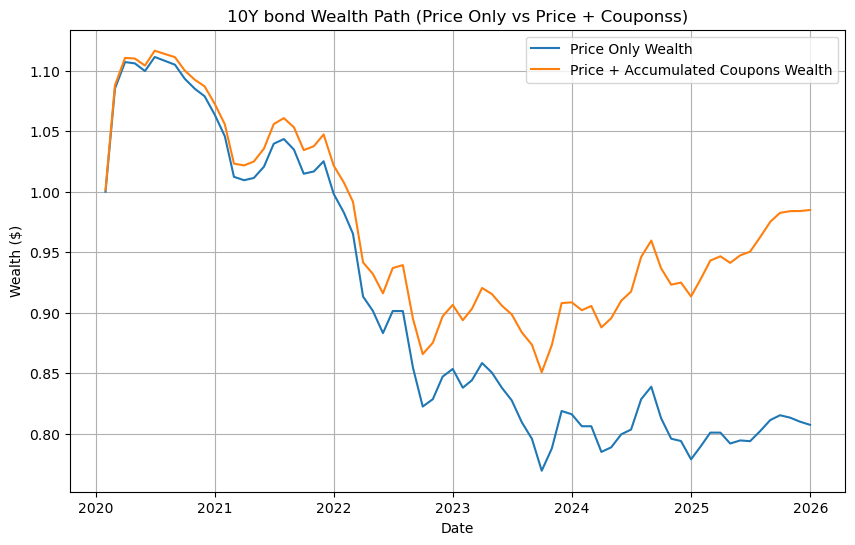

In [27]:
# plot configs
# Case without reinvestment of coupons.
# Compare price only wealth path vs price wealth + accumulated Coupons wealth path in nominal terms.
# This shows the impact of coupons on wealth accumulation over time.
columns_to_plot_acc = ["10Y bond_price_wealth", "10Y bond_nominal_wealth"]
title_acc = "10Y bond Wealth Path (Price Only vs Price + Couponss)"
labels_acc = {"10Y bond_price_wealth": "Price Only Wealth", "10Y bond_nominal_wealth": "Price + Accumulated Coupons Wealth"}
plot_wealth_path(bond_wealth_path_acc, columns_to_plot_acc, labels_acc, title_acc)